# Feature Selection

En esta sección analizaremos la correlación entre las variables para determinar si podemos descartar aquellas que no tienen correlación con respecto a nuestra variable dependiente

## Lectura de datos

In [1]:
import pandas as pd

In [38]:
datos = pd.read_excel('01.Generación sin nulos.xlsx')
datos.dtypes

dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
fltTemp                           int64
fltProbabilidadLluvia             int64
fltHumedadRelativa                int64
fltVelocidadViento                int64
fltCoberturaNubes                 int64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga                int64
fltDPT                            int64
dtype: object

In [40]:
# Filtrar las columnas que comienzan con 'flt'
flt_columns = [col for col in datos.columns if col.startswith('flt')]

# Cambiar el tipo de dato de las columnas filtradas (por ejemplo, a int o string)
datos[flt_columns] = datos[flt_columns].astype('float')  # Cambia 'int' por el tipo que necesites

# Confirmar los cambios
print(datos.dtypes)


dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
fltTemp                         float64
fltProbabilidadLluvia           float64
fltHumedadRelativa              float64
fltVelocidadViento              float64
fltCoberturaNubes               float64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga              float64
fltDPT                          float64
dtype: object


In [42]:
datos = datos.drop(columns={'iCodDia', 'iCodHora'})

In [43]:
datos.head()

,dtHora,fltValGeneracion,iNumDia,iNumAnio,iNumSemana,iNumDiaSemana,iNumMes,iNumHora,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltDPT
0,2022-09-01 00:00:00,0.0,1,2022,36,5,9,24,19.0,7.0,77.0,15.0,98.0,0.0,4,4,32.0,15.0
1,2022-09-01 01:00:00,0.0,1,2022,36,5,9,1,19.0,7.0,82.0,13.0,82.0,0.0,4,4,32.0,16.0
2,2022-09-01 02:00:00,0.0,1,2022,36,5,9,2,18.0,9.0,85.0,11.0,73.0,0.0,3,4,28.0,16.0
3,2022-09-01 03:00:00,0.0,1,2022,36,5,9,3,18.0,11.0,87.0,11.0,63.0,0.0,3,4,26.0,16.0
4,2022-09-01 04:00:00,0.0,1,2022,36,5,9,4,18.0,11.0,88.0,11.0,70.0,0.0,3,4,24.0,16.0


In [44]:
datos = datos.rename(columns={
    'dtHora': 'Fecha',
    'fltValGeneracion': 'Generación',
    'iNumDia': 'Día',
    'iNumAnio': 'Año',
    'iNumSemana': 'Semana',
    'iNumDiaSemana': 'Día Semana',
    'iNumMes': 'Mes',
    'iNumHora': 'Hora',
    'fltTemp': 'Temperatura',
    'fltProbabilidadLluvia': 'Probabilidad Lluvia',
    'fltHumedadRelativa': 'Humedad Relativa',
    'fltVelocidadViento': 'Velocidad Viento',
    'fltCoberturaNubes': 'Cobertura Nubes',
    'fltIndiceUV': 'Índice UV',
    'iCodCondCielo': 'Condición Cielo',
    'iCodDirViento': 'Dirección Viento',
    'fltVelocidadRafaga': 'Velocidad Ráfaga',
    'fltDPT': 'DPT'
})


In [31]:
datos.head()

,Fecha,Generación,Día,Año,Semana,Día Semana,Mes,Hora,Temperatura,Probabilidad Lluvia,Humedad Relativa,Velocidad Viento,Cobertura Nubes,Índice UV,Condición Cielo,Dirección Viento,Velocidad Ráfaga,DPT
0,2022-09-01 00:00:00,0.0,1,2022,36,5,9,24,19.0,7.0,77.0,15.0,98.0,0.0,4,4,32.0,15.0
1,2022-09-01 01:00:00,0.0,1,2022,36,5,9,1,19.0,7.0,82.0,13.0,82.0,0.0,4,4,32.0,16.0
2,2022-09-01 02:00:00,0.0,1,2022,36,5,9,2,18.0,9.0,85.0,11.0,73.0,0.0,3,4,28.0,16.0
3,2022-09-01 03:00:00,0.0,1,2022,36,5,9,3,18.0,11.0,87.0,11.0,63.0,0.0,3,4,26.0,16.0
4,2022-09-01 04:00:00,0.0,1,2022,36,5,9,4,18.0,11.0,88.0,11.0,70.0,0.0,3,4,24.0,16.0


## Correlación Pearson

In [45]:
correlations = datos.corr(numeric_only=True)['Generación'].sort_values(ascending=False)
correlations

Generación             1.000000
Índice UV              0.784434
Temperatura            0.521180
Hora                   0.109536
Año                    0.096949
Velocidad Viento       0.073393
Velocidad Ráfaga       0.071937
Dirección Viento       0.019556
Día                   -0.003437
Día Semana            -0.009946
Mes                   -0.089841
Semana                -0.091507
Probabilidad Lluvia   -0.095980
DPT                   -0.120180
Cobertura Nubes       -0.140164
Condición Cielo       -0.197619
Humedad Relativa      -0.485734
Name: Generación, dtype: float64

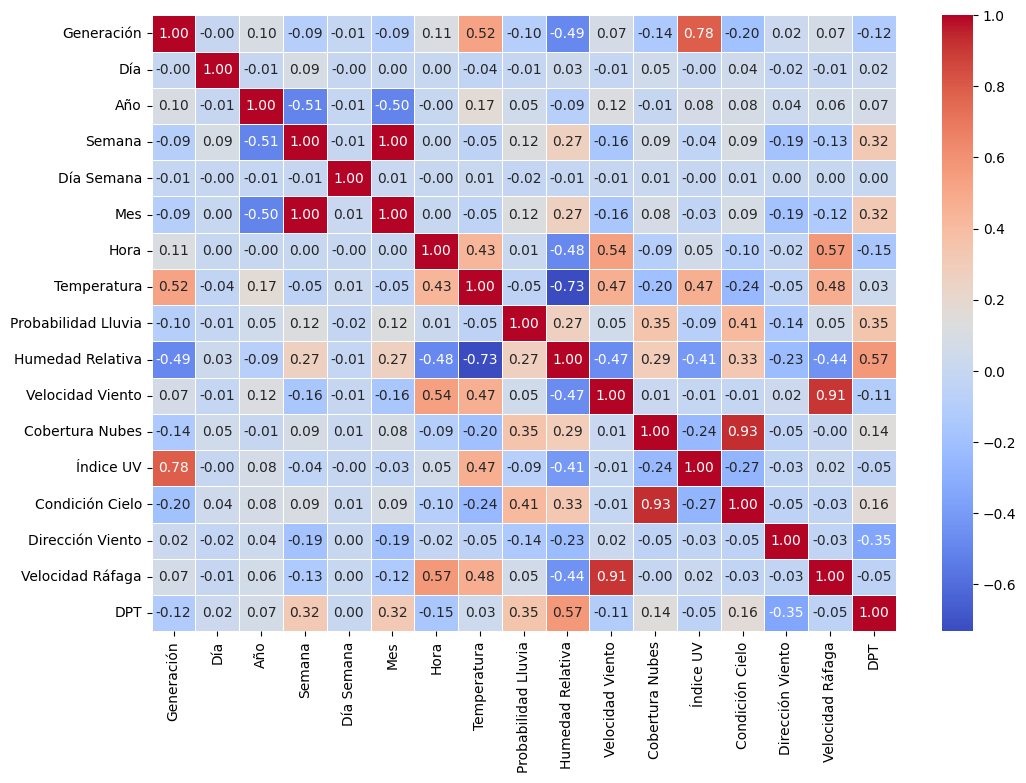

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = datos.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalizar
plt.show()


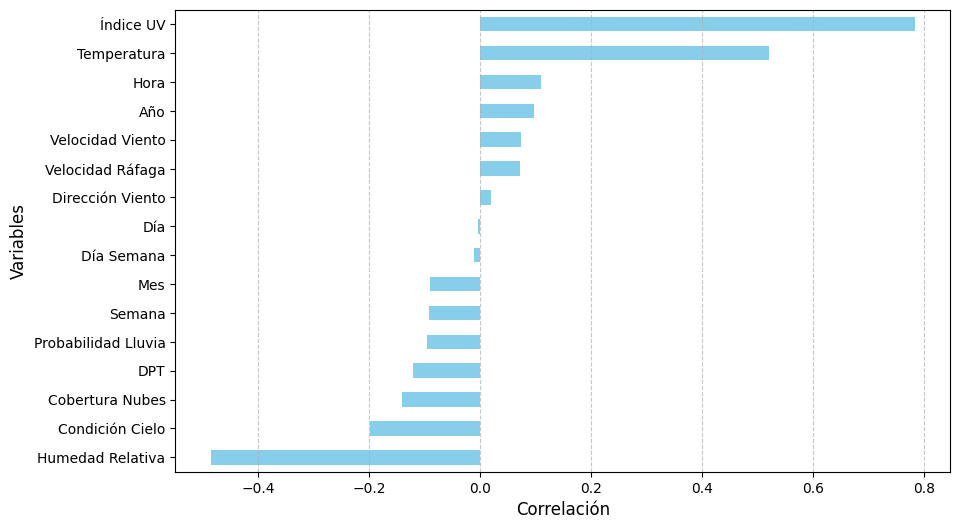

In [47]:
# Seleccionar las correlaciones con fltValGeneracion
correlations = datos.corr(numeric_only=True)['Generación'].sort_values()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
correlations.drop('Generación').plot(kind='barh', color='skyblue')

# Personalizar
plt.xlabel("Correlación", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Para el artículo de CT-Net, nos vamos a quedar solamente con los que tengan correlación de [0.35, 1] o [-1, -0.35], mientras que con los demás, nos quedaremos con [0.10, 1] o [-1, -0.10].

In [56]:
datos = datos[['Fecha', 'Generación', 'Índice UV', 'Temperatura', 'Hora', 'DPT', 'Cobertura Nubes', 'Condición Cielo', 'Humedad Relativa']]
datos.head()

,Fecha,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
0,2022-09-01 00:00:00,0.0,0.0,19.0,24,15.0,98.0,4,77.0
1,2022-09-01 01:00:00,0.0,0.0,19.0,1,16.0,82.0,4,82.0
2,2022-09-01 02:00:00,0.0,0.0,18.0,2,16.0,73.0,3,85.0
3,2022-09-01 03:00:00,0.0,0.0,18.0,3,16.0,63.0,3,87.0
4,2022-09-01 04:00:00,0.0,0.0,18.0,4,16.0,70.0,3,88.0


In [57]:
datos.to_excel("02.Generación Pearson.xlsx", header=True, index=False)

In [58]:
ctnet = pd.read_excel('01.Generación sin nulos CT-NET.xlsx')
ctnet.dtypes

dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
iCodDia.1                         int64
fltTemp                           int64
fltProbabilidadLluvia             int64
fltHumedadRelativa                int64
fltVelocidadViento                int64
fltCoberturaNubes                 int64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga                int64
fltDPT                            int64
dtype: object

In [59]:
# Filtrar las columnas que comienzan con 'flt'
flt_columns = [col for col in ctnet.columns if col.startswith('flt')]

# Cambiar el tipo de dato de las columnas filtradas (por ejemplo, a int o string)
ctnet[flt_columns] = ctnet[flt_columns].astype('float')  # Cambia 'int' por el tipo que necesites

# Confirmar los cambios
print(ctnet.dtypes)


dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
iCodDia.1                         int64
fltTemp                         float64
fltProbabilidadLluvia           float64
fltHumedadRelativa              float64
fltVelocidadViento              float64
fltCoberturaNubes               float64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga              float64
fltDPT                          float64
dtype: object


In [60]:
ctnet = ctnet.rename(columns={
    'dtHora': 'Fecha',
    'fltValGeneracion': 'Generación',
    'iNumDia': 'Día',
    'iNumAnio': 'Año',
    'iNumSemana': 'Semana',
    'iNumDiaSemana': 'Día Semana',
    'iNumMes': 'Mes',
    'iNumHora': 'Hora',
    'fltTemp': 'Temperatura',
    'fltProbabilidadLluvia': 'Probabilidad Lluvia',
    'fltHumedadRelativa': 'Humedad Relativa',
    'fltVelocidadViento': 'Velocidad Viento',
    'fltCoberturaNubes': 'Cobertura Nubes',
    'fltIndiceUV': 'Índice UV',
    'iCodCondCielo': 'Condición Cielo',
    'iCodDirViento': 'Dirección Viento',
    'fltVelocidadRafaga': 'Velocidad Ráfaga',
    'fltDPT': 'DPT'
})


In [61]:
ctnet = ctnet[['Fecha', 'Generación', 'Índice UV', 'Temperatura', 'Humedad Relativa']]
ctnet.head()

,Fecha,Generación,Índice UV,Temperatura,Humedad Relativa
0,2022-09-01 00:00:00,0.0,0.0,19.0,77.0
1,2022-09-01 01:00:00,0.0,0.0,19.0,82.0
2,2022-09-01 02:00:00,0.0,0.0,18.0,85.0
3,2022-09-01 03:00:00,0.0,0.0,18.0,87.0
4,2022-09-01 04:00:00,0.0,0.0,18.0,88.0


In [62]:
ctnet.to_excel("02.Generación Pearson CT-NET.xlsx", header=True, index=False)

In [63]:
photo = pd.read_excel('01.Generación sin nulos Photovoltaic.xlsx')
photo.dtypes

dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
iCodDia.1                         int64
fltTemp                           int64
fltProbabilidadLluvia             int64
fltHumedadRelativa                int64
fltVelocidadViento                int64
fltCoberturaNubes                 int64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga                int64
fltDPT                            int64
dtype: object

In [64]:
# Filtrar las columnas que comienzan con 'flt'
flt_columns = [col for col in photo.columns if col.startswith('flt')]

# Cambiar el tipo de dato de las columnas filtradas (por ejemplo, a int o string)
photo[flt_columns] = photo[flt_columns].astype('float')  # Cambia 'int' por el tipo que necesites

# Confirmar los cambios
print(photo.dtypes)


dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
iCodDia.1                         int64
fltTemp                         float64
fltProbabilidadLluvia           float64
fltHumedadRelativa              float64
fltVelocidadViento              float64
fltCoberturaNubes               float64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga              float64
fltDPT                          float64
dtype: object


In [65]:
photo = photo.rename(columns={
    'dtHora': 'Fecha',
    'fltValGeneracion': 'Generación',
    'iNumDia': 'Día',
    'iNumAnio': 'Año',
    'iNumSemana': 'Semana',
    'iNumDiaSemana': 'Día Semana',
    'iNumMes': 'Mes',
    'iNumHora': 'Hora',
    'fltTemp': 'Temperatura',
    'fltProbabilidadLluvia': 'Probabilidad Lluvia',
    'fltHumedadRelativa': 'Humedad Relativa',
    'fltVelocidadViento': 'Velocidad Viento',
    'fltCoberturaNubes': 'Cobertura Nubes',
    'fltIndiceUV': 'Índice UV',
    'iCodCondCielo': 'Condición Cielo',
    'iCodDirViento': 'Dirección Viento',
    'fltVelocidadRafaga': 'Velocidad Ráfaga',
    'fltDPT': 'DPT'
})


In [66]:
photo = photo[['Fecha', 'Generación', 'Índice UV', 'Temperatura', 'Hora', 'DPT', 'Cobertura Nubes', 'Condición Cielo', 'Humedad Relativa']]
photo.head()

,Fecha,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
0,2022-09-01 00:00:00,0.0,0.0,19.0,24,15.0,98.0,4,77.0
1,2022-09-01 01:00:00,0.0,0.0,19.0,1,16.0,82.0,4,82.0
2,2022-09-01 02:00:00,0.0,0.0,18.0,2,16.0,73.0,3,85.0
3,2022-09-01 03:00:00,0.0,0.0,18.0,3,16.0,63.0,3,87.0
4,2022-09-01 04:00:00,0.0,0.0,18.0,4,16.0,70.0,3,88.0


In [67]:
photo.to_excel("02.Generación Pearson Photovoltaic.xlsx", header=True, index=False)